In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# raw string enables any OS to be able to evaluate the file path, error_bad_lines -> skipping bad lines not showing errors, continue to read the file
# error_bad_lines has been deprecated. on_bad_lines argument is recommended
# comments = pd.read_csv(r'./time_series_analysis/UScomments.csv', error_bad_lines=False)
comments = pd.read_csv(r'./time_series_analysis/UScomments.csv', on_bad_lines='skip')

C:\Users\Than Aung Kyaw\AppData\Local\Temp\ipykernel_14536\4109650312.py:4: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'./time_series_analysis/UScomments.csv', on_bad_lines='skip')


In [52]:
# Series is like an array/list - 1 dimension
# Dataframe is a collection of series, 2D-array
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [53]:
comments.isnull()
# Checking if dataframe includes null values in each row

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [54]:
comments.isnull().sum()
# Checking the total count of missing values in each column of dataframe

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [55]:
comments.dropna(inplace=True)
# Drop the rows where at least one element is missing.
# inplacebool, default False: whether to modify the DataFrame 
# rather than creating a new one. Does not return if True

In [56]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [1]:
%pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     --- --------------------------------- 61.4/636.8 kB 544.7 kB/s eta 0:00:02
     ------ ----------------------------- 112.6/636.8 kB 731.4 kB/s eta 0:00:01
     ---------- ------------------------- 194.6/636.8 kB 985.7 kB/s eta 0:00:01
     ------------------ ------------------- 317.4/636.8 kB 1.4 MB/s eta 0:00:01
     -------------------------- ----------- 450.6/636.8 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [57]:
from textblob import TextBlob

In [58]:
comments.shape

(691375, 4)

In [59]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [60]:
sample_df = comments[0:5000]
sample_df.shape

(5000, 4)

In [61]:
polarity = []
for comment in sample_df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [62]:
len(polarity)

5000

In [63]:
sample_df['polarity'] = polarity

C:\Users\Than Aung Kyaw\AppData\Local\Temp\ipykernel_14536\2266223824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['polarity'] = polarity


In [64]:
sample_df.tail(5)

,video_id,comment_text,likes,replies,polarity
4995,eM_FR7I2Ttw,He should do a cover of are you gonna be my gi...,1,0,0.000000
4996,eM_FR7I2Ttw,I'd love to hear Harry write like...an entire ...,1,0,0.275000
4997,eM_FR7I2Ttw,This's so beautiful,2,0,0.850000
4998,eM_FR7I2Ttw,nothing but respect for MY president,0,0,0.000000
4999,eM_FR7I2Ttw,*To everyone who is new here: he actually perf...,2,0,-0.115909


In [65]:
filter1 = sample_df['polarity'] == 1

In [66]:
sample_df[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
4815,62cWuFjzOgs,Thats the best color!,0,0,1.0
4953,eM_FR7I2Ttw,"*YES IT IS TRENDING, SO PROUD OF HIM!!*",3,0,1.0
4955,eM_FR7I2Ttw,One of the best rock stars In years...!,3,0,1.0
4974,eM_FR7I2Ttw,He is no Lindsey Buckingham but it was good!!,0,0,1.0


In [67]:
pos_comments = sample_df[filter1]
pos_comments

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
4815,62cWuFjzOgs,Thats the best color!,0,0,1.0
4953,eM_FR7I2Ttw,"*YES IT IS TRENDING, SO PROUD OF HIM!!*",3,0,1.0
4955,eM_FR7I2Ttw,One of the best rock stars In years...!,3,0,1.0
4974,eM_FR7I2Ttw,He is no Lindsey Buckingham but it was good!!,0,0,1.0


In [68]:
filter2 = sample_df['polarity'] == -1

In [69]:
sample_df[filter2]

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
2043,B7YaMkCl3XA,Economy is horrible in Cuba. It's going to be ...,0,0,-1.0
2088,B7YaMkCl3XA,Sub to me if this is terrible,0,1,-1.0
2192,5ywKal6-anc,PATHETIC,1,0,-1.0
2410,EVp4-qjWVJE,I don't like this sportscaster sounds very an...,0,0,-1.0


In [70]:
neg_comments = sample_df[filter2]
neg_comments

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
2043,B7YaMkCl3XA,Economy is horrible in Cuba. It's going to be ...,0,0,-1.0
2088,B7YaMkCl3XA,Sub to me if this is terrible,0,1,-1.0
2192,5ywKal6-anc,PATHETIC,1,0,-1.0
2410,EVp4-qjWVJE,I don't like this sportscaster sounds very an...,0,0,-1.0


In [71]:
type(sample_df['comment_text'])

pandas.core.series.Series

In [36]:
# %pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 944.1 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [72]:
from wordcloud import WordCloud, STOPWORDS

In [73]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [74]:
total_pos_comments = ' '.join(pos_comments['comment_text'])

In [75]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_pos_comments)

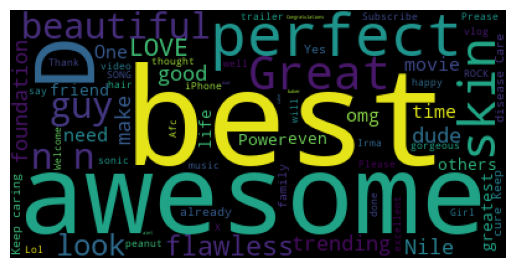

In [76]:
plt.axis('off')
plt.imshow(wordcloud)

In [77]:
total_neg_comments = ' '.join(neg_comments['comment_text'])

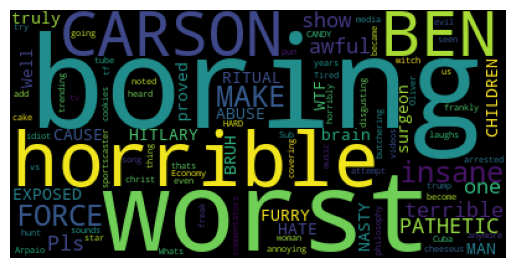

In [78]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_neg_comments)
plt.axis('off')
plt.imshow(wordcloud)

###Performing Emoji Analysis

In [100]:
%pip install emoji==2.10.0
# %pip install emoji==2.2.0

  Obtaining dependency information for emoji==2.10.0 from https://files.pythonhosted.org/packages/8d/97/fbe537350214b0489e6c7052b9e8928a85ed5febb621a82cc5437dbf17e7/emoji-2.10.0-py2.py3-none-any.whl.metadata
  Using cached emoji-2.10.0-py2.py3-none-any.whl.metadata (5.3 kB)
Using cached emoji-2.10.0-py2.py3-none-any.whl (457 kB)
  Attempting uninstall: emoji
    Found existing installation: emoji 2.2.0
    Uninstalling emoji-2.2.0:
      Successfully uninstalled emoji-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [101]:
import emoji

In [102]:
emoji.__version__

'2.2.0'

In [81]:
sample_df['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

Extract emoji from texts

In [82]:
text = 'trending 😉'

# LIST COMPREHENSION
[char for char in text if char in emoji.EMOJI_DATA]

['😉']

List Comprehension explained below 

In [83]:
emoji_list = []
for char in text:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
emoji_list

['😉']

In [86]:
all_emojis = []
for comment in sample_df['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis.append(char)

In [87]:
all_emojis[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In list comprehension format

In [104]:
new_all_emojis = [char for comment in sample_df['comment_text'].dropna() for char in comment if char in emoji.EMOJI_DATA]
new_all_emojis[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

We need count of these emojis to analyse the frequency

In [88]:
from collections import Counter

In [89]:
type(all_emojis)

list

Changed the datatype of emojis so that they can be executed on Counter()

In [90]:
Counter(all_emojis).most_common(10)

[('😂', 333),
 ('😍', 231),
 ('❤', 176),
 ('😊', 51),
 ('🔥', 44),
 ('💖', 42),
 ('👍', 41),
 ('👏', 40),
 ('🏻', 37),
 ('😮', 36)]

In [92]:
Counter(all_emojis).most_common(10)[0][0]

'😂'

In [94]:
Counter(all_emojis).most_common(10)[0][1]

333

In [95]:
emojis_list = [Counter(all_emojis).most_common(10)[i][0] for i in range(10)]
emojis_list

['😂', '😍', '❤', '😊', '🔥', '💖', '👍', '👏', '🏻', '😮']

In [96]:
freq_list = [Counter(all_emojis).most_common(10)[i][1] for i in range(10)]
freq_list

[333, 231, 176, 51, 44, 42, 41, 40, 37, 36]

In [97]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [98]:
trace = go.Bar(x=emojis_list, y=freq_list)

In [99]:
iplot([trace])

Gathering entire data from youtube

In [106]:
import os

files = os.listdir(r'D:\data_analysis\additional_data')
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [109]:
csv_files = [file for file in files if '.csv' in file]
csv_files

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [113]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [111]:
full_df = pd.DataFrame()
path = r'D:\data_analysis\additional_data'
for file in csv_files:
    current_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1', on_bad_lines='skip')
    full_df = pd.concat([full_df,current_df], ignore_index=True)

In [112]:
full_df.shape

(375942, 16)

In [114]:
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937     True
375938    False
375939    False
375940    False
375941    False
Length: 375942, dtype: bool

In [115]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [116]:
full_df = full_df.drop_duplicates()

In [117]:
full_df.shape

(339525, 16)

How to export data into (csv,json,db)

Exporting to csv

In [119]:
full_df[0:3000].to_csv(r'D:\data_analysis\cleaned_data\youtube_sample.csv', index=False)

Exporting json

In [121]:
full_df[0:3000].to_json(r'D:\data_analysis\cleaned_data\youtube_sample.json')

Exporting to DB

In [123]:
from sqlalchemy import create_engine

In [125]:
engine = create_engine(r'sqlite:///D:\data_analysis\cleaned_data\youtube_sample.sqlite')

Execute the below line only once

In [126]:
full_df[0:3000].to_sql('Users', con=engine, if_exists='append')

3000

We can access this sqlite db file using pandas and sqlite3 packages from python and interact with the users table created in the database

In [127]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


We want to analyse which category has the most likes.
But the dataframe only has category ID and not name(label) to match with.
We will use a dictionary of labels and match it with the ID to actually get readable category data.
This is part of a data 'preprocessing'

In [128]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [129]:
json_df = pd.read_json(r'D:\data_analysis\additional_data\US_category_id.json')

In [132]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [133]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [134]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [135]:
full_df['category_id'].map(cat_dict)

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
375936      People & Blogs
375938      People & Blogs
375939       Entertainment
375940    Film & Animation
375941              Gaming
Name: category_id, Length: 339525, dtype: object

In [136]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [137]:
full_df.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


25th percentile of each category
median, max, min
75th percentile

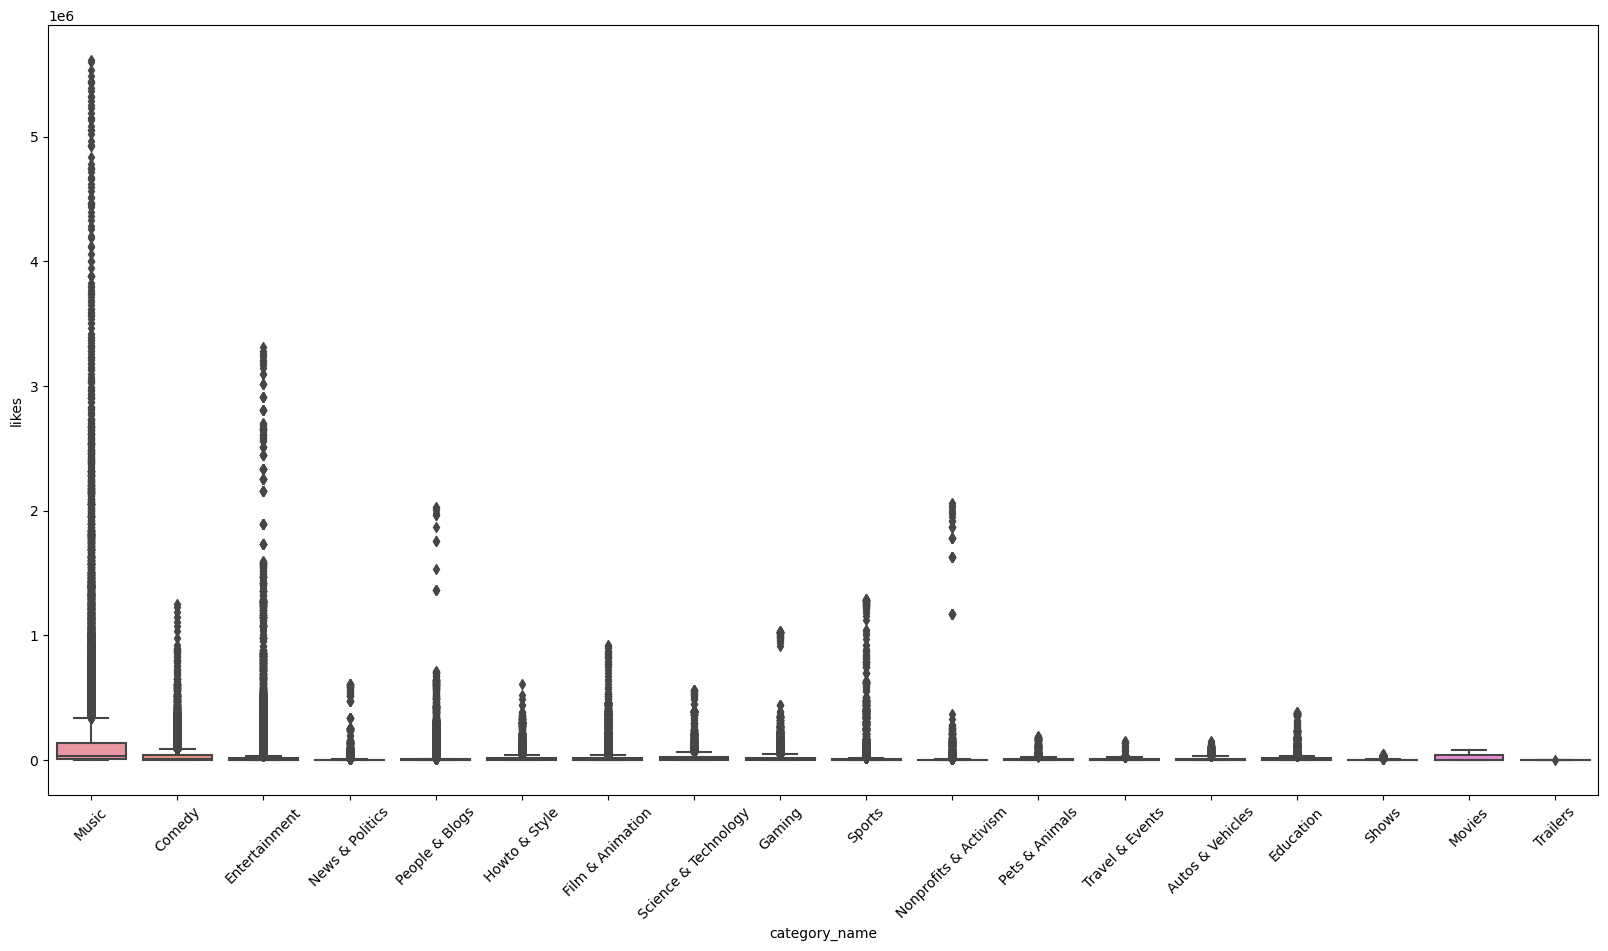

In [139]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data=full_df, x='category_name', y='likes')
plt.show()

Analysing audience is engaged or not

Like rates
Dislike rates
COmment counts

which videos get more engagement?

In [141]:
full_df['like_rate']= (full_df['likes']/full_df['views'])*100
full_df['dislike_rate']= (full_df['dislikes']/full_df['views'])*100
full_df['comment_rate']= (full_df['comment_count']/full_df['views'])*100

In [142]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_rate'],
      dtype='object')

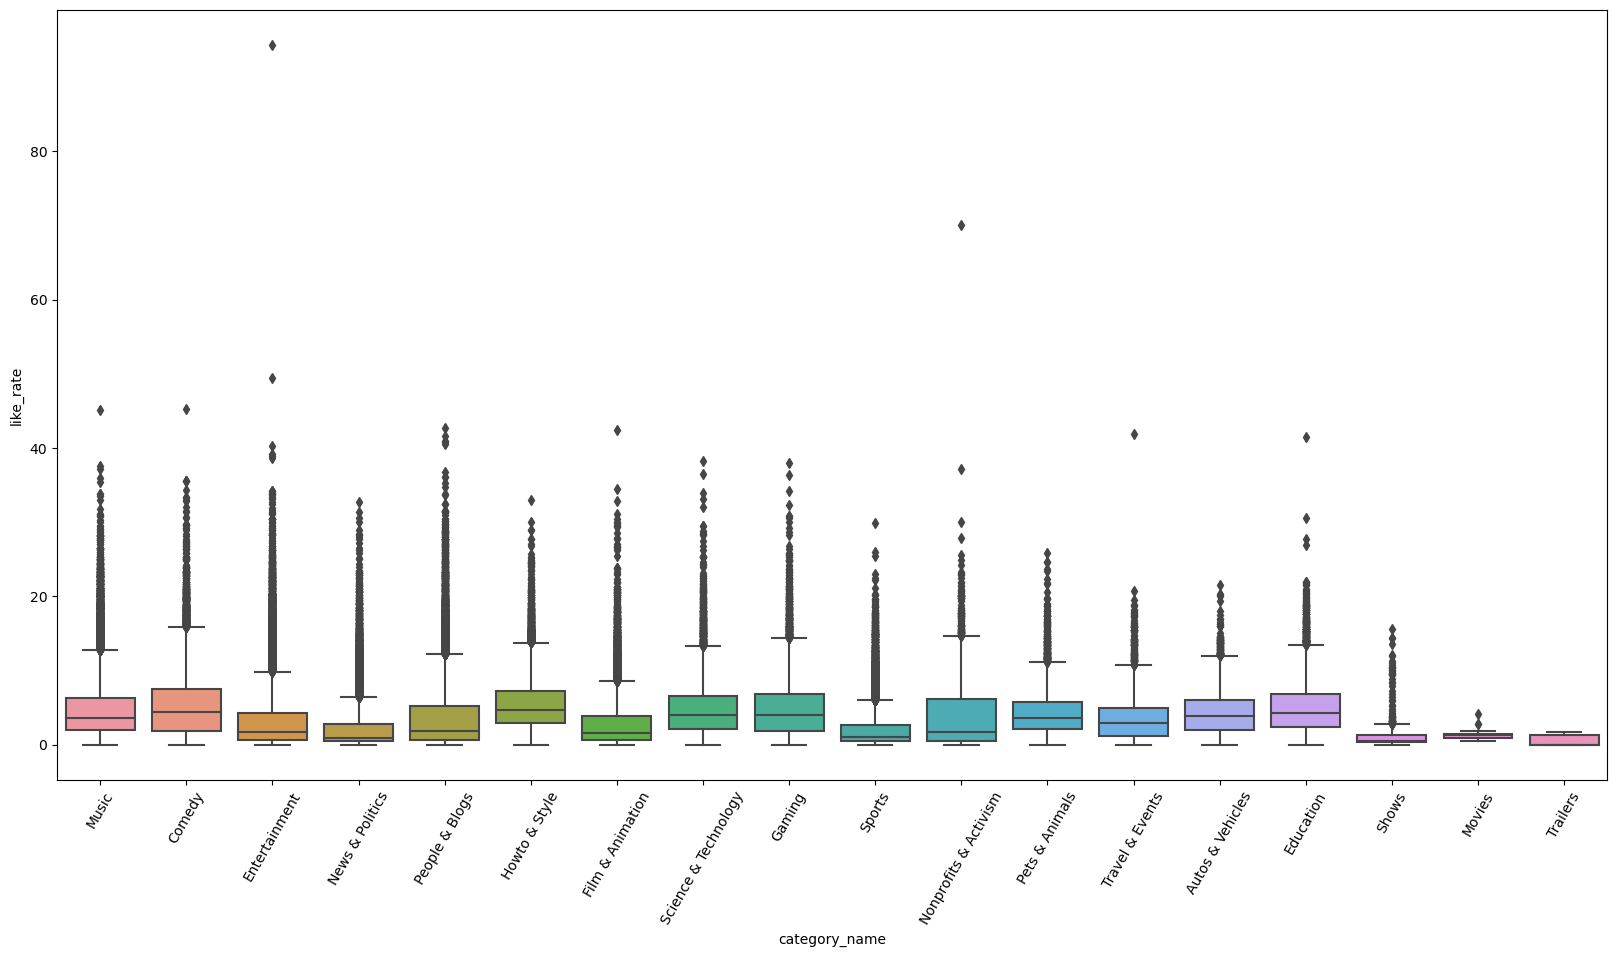

In [149]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
sns.boxplot(data=full_df, x='category_name', y='like_rate')
plt.show()

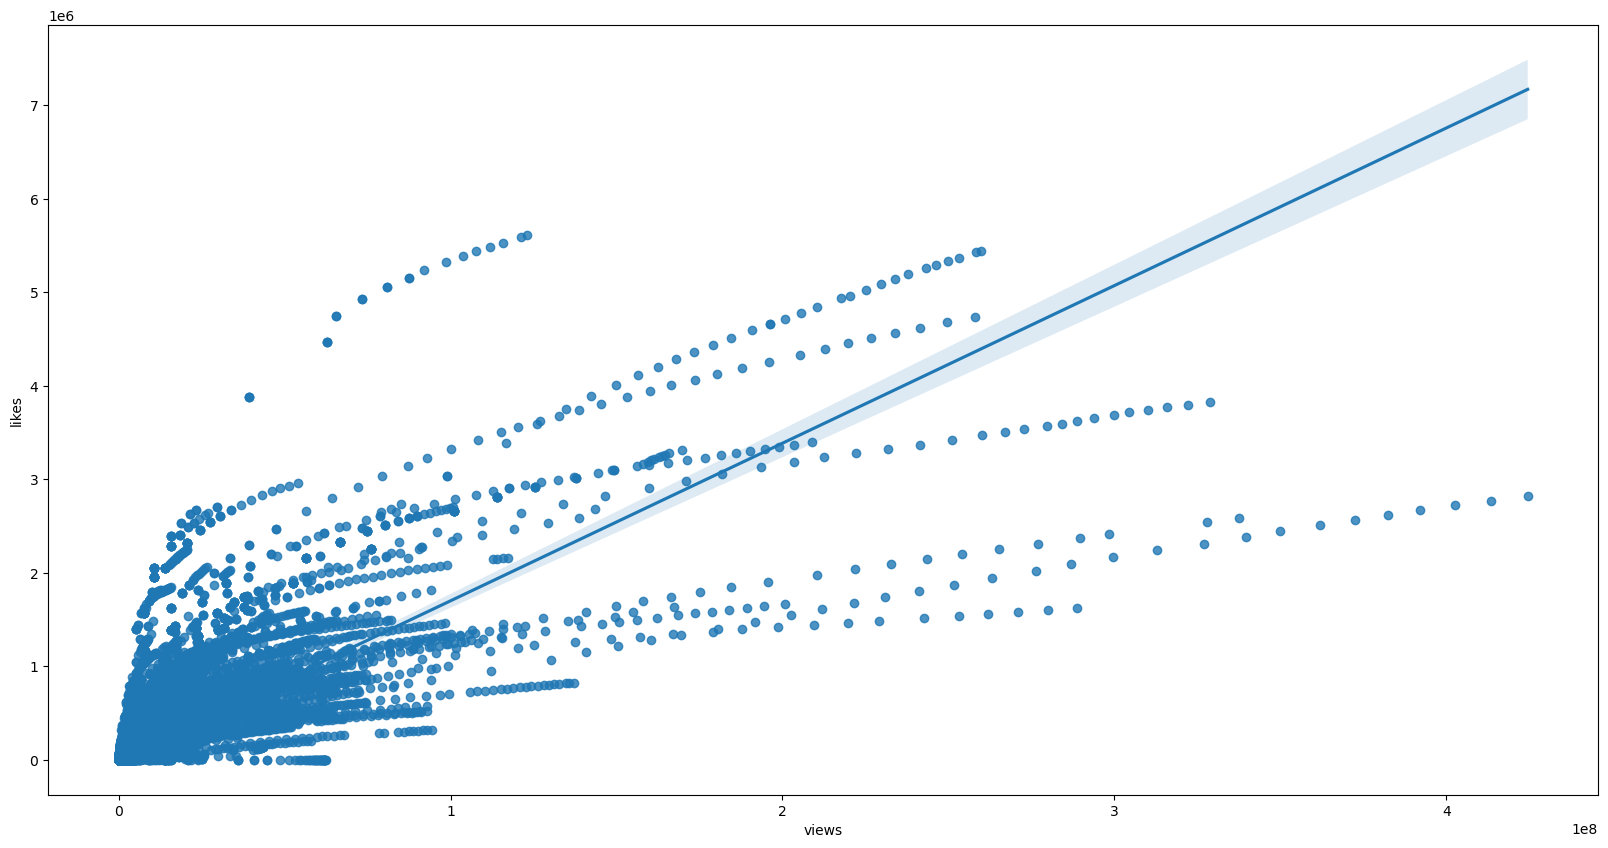

In [148]:
plt.figure(figsize=(20,10))
sns.regplot(data=full_df, x='views', y='likes')
plt.show()

In theory, if views increase, likes will also increase
We can cross-check that using correlation.
Correlation in a nutshell is that if view increases in 1 unit, like will also increase in 1 unit.
We can check how views and likes correlate to each other this way.

In [150]:
full_df[['views', 'likes','dislikes']]

,views,likes,dislikes
0,17158579,787425,43420
1,1014651,127794,1688
2,3191434,146035,5339
3,2095828,132239,1989
4,33523622,1634130,21082
...,...,...,...
375936,8259128,645888,4052
375938,1064798,60008,382
375939,1066451,48068,1032
375940,5660813,192957,2846


In [151]:
full_df[['views', 'likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


Explaining the above data

For each view, of course, view will increase in a 1 to 1 ratio since it is the same value.
For likes, when view increases for 1 unit, likes will increase for 0.78 unit. 
In other words, for a 100 views, there will approximately be 78 likes.

We can visualise this correlation table using various plots such as heatmap

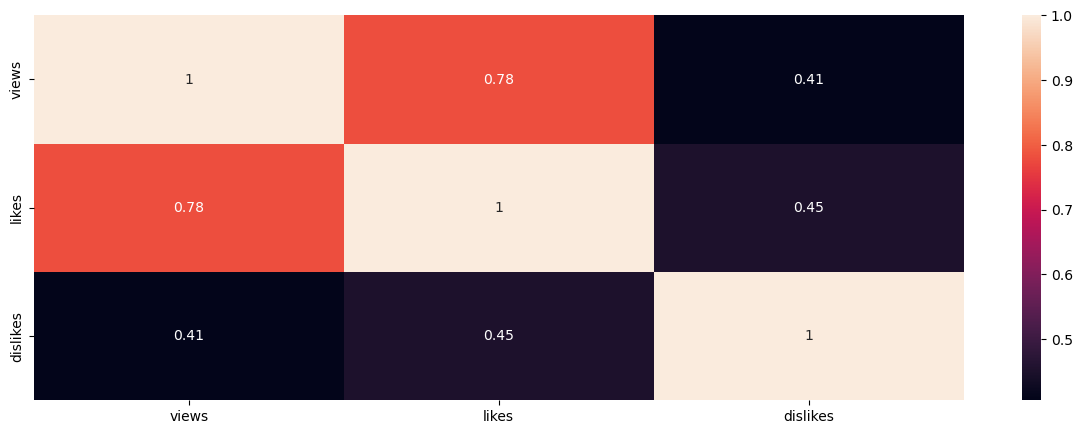

In [157]:
plt.figure(figsize=(15,5))
sns.heatmap(full_df[['views', 'likes','dislikes']].corr(), annot=True)
plt.show()

In [158]:
full_df['channel_title'].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: channel_title, Length: 37824, dtype: int64

In [161]:
full_df.groupby(['channel_title']).size().sort_values(ascending=False)

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Kd Malts                                1
Zedan TV                                1
Kc Kelly - Rocketprenuer                1
Kbaby                                   1
Pavel Sidorik TV                        1
Length: 37824, dtype: int64

Make a dataframe out of it

In [163]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


Rename the column 0 with total_videos

In [167]:
cdf = cdf.rename(columns={0:'total_videos'})
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [169]:
import plotly.express as px

In [170]:
px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos')

Does puntuation in video titles matter help increases views, likes, dislikes and comments of videos?
If puntuation increases, views increases?

In [171]:
import string

In [172]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [173]:
[char for char in full_df['title'][0] if char in string.punctuation]

['-', '(', ')', '.']

In [174]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [176]:
# full_df['title'].apply(punc_count)
sample_vids = full_df[0:3000]
sample_vids['count_punc'] = sample_vids['title'].apply(punc_count)
sample_vids['count_punc']

0       4
1       1
2       3
3       3
4       3
       ..
2995    8
2996    1
2997    5
2998    1
2999    1
Name: count_punc, Length: 3000, dtype: int64

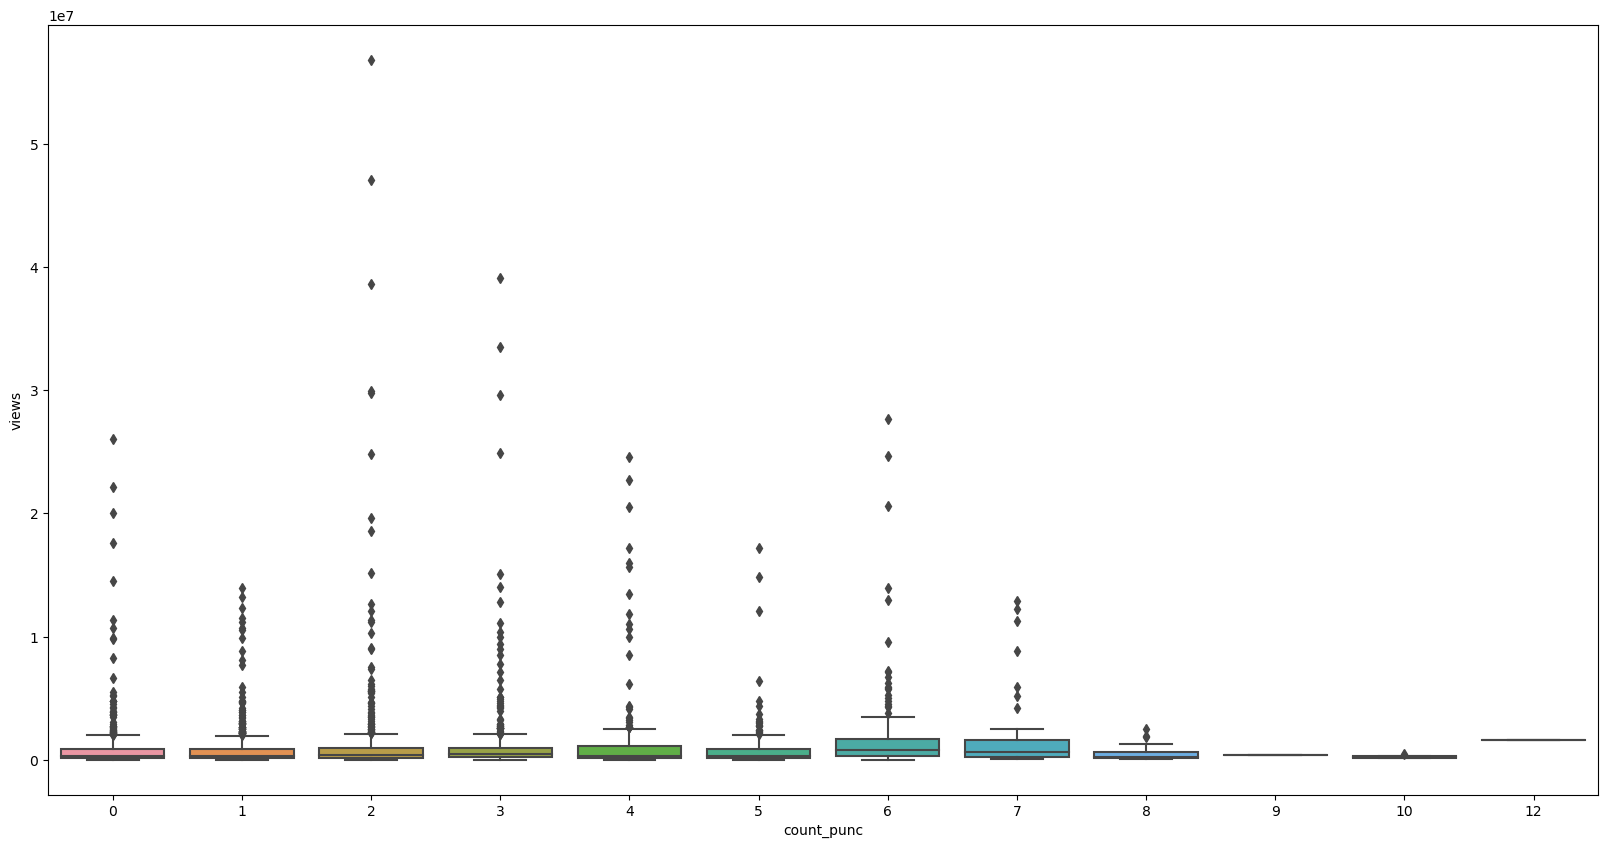

In [177]:
plt.figure(figsize=(20,10))
sns.boxplot(data=sample_vids, x='count_punc', y='views')
plt.show()

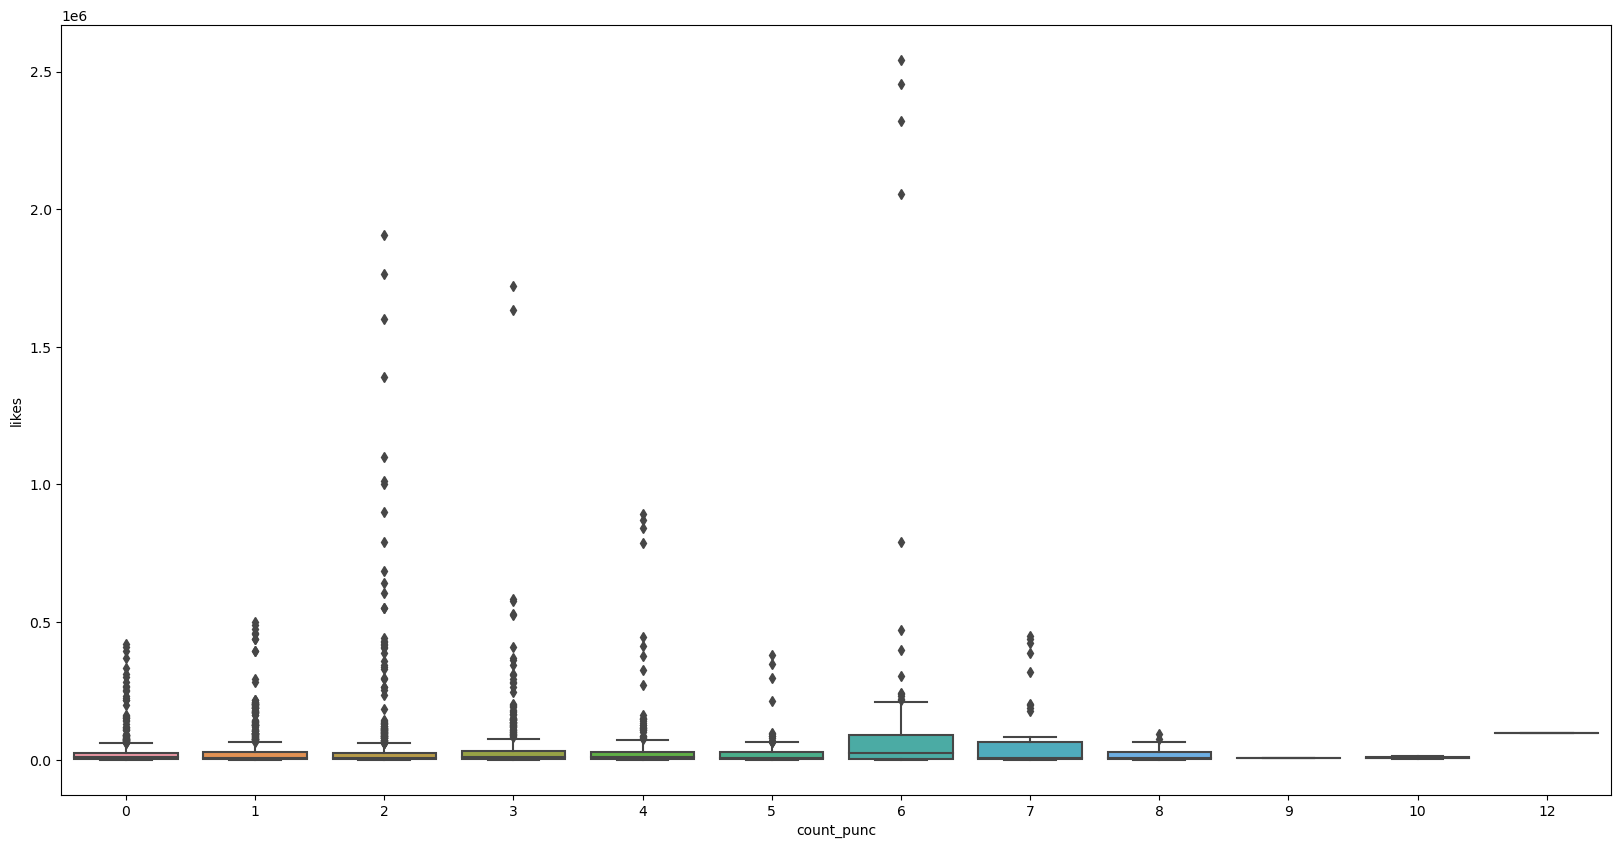

In [178]:
plt.figure(figsize=(20,10))
sns.boxplot(data=sample_vids, x='count_punc', y='likes')
plt.show()

What we achieved in this analysis

Text analysis on Youtube videos with Python

• Conducted sentiment analysis on the comments of certain Youtube videos using TextBlob library, discovering audience’s attitude towards the videos and youtubers; Visualized audience’s attitude with WordCloud

• Discovered most used emojis

• Computed audience engagement rate & like rate among different categories of videos and found trending channels

• Investigated relationship between number of views & number of likes, and relationship between video title naming & number of views using linear regression models.